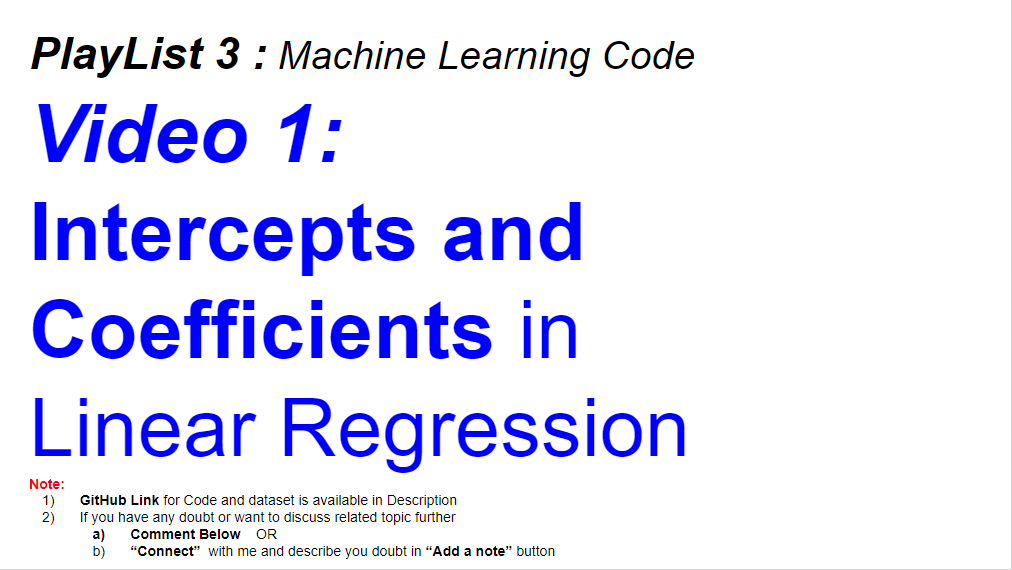

In [1]:
# Importing Lbraries
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
#  to sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is displayed inline within frontends
# like the Jupyter notebook, directly below the code cell that produced it.

In [2]:
data = pd.read_csv('Advertising.csv')
data
# I/p parameters or "InDependent" features : advertising in "TV" , "Radio" , "Newspaper"
# O/p parameter or "Dependent" feature : "Sales"

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.shape # # to print the SHAPE of the dataframe

(200, 5)

In [4]:
data.info() # to print the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.isnull().sum() # counting the number of Null values in each feature of the dataset

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

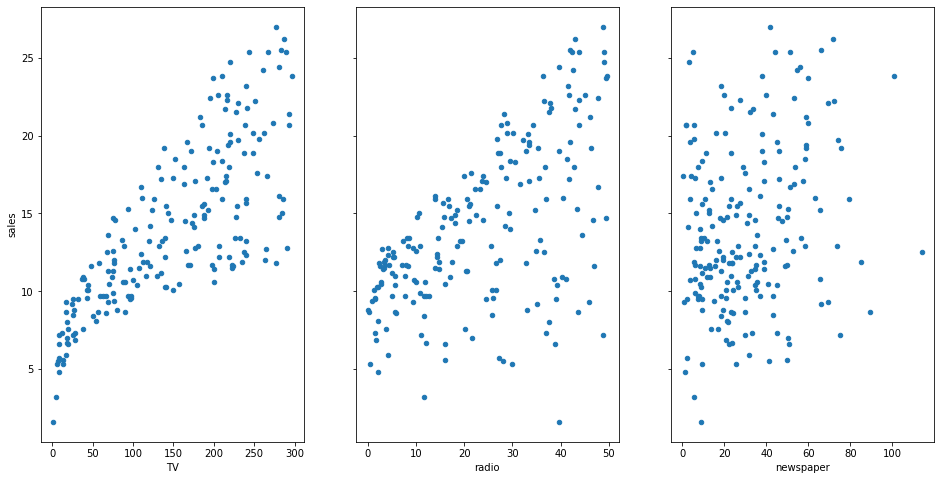

In [6]:
# To visualize the relationship between the features {i/p} and the response {o/p} using ScatterPlots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind = 'scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind = 'scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind = 'scatter', x='newspaper', y='sales', ax=axs[2])

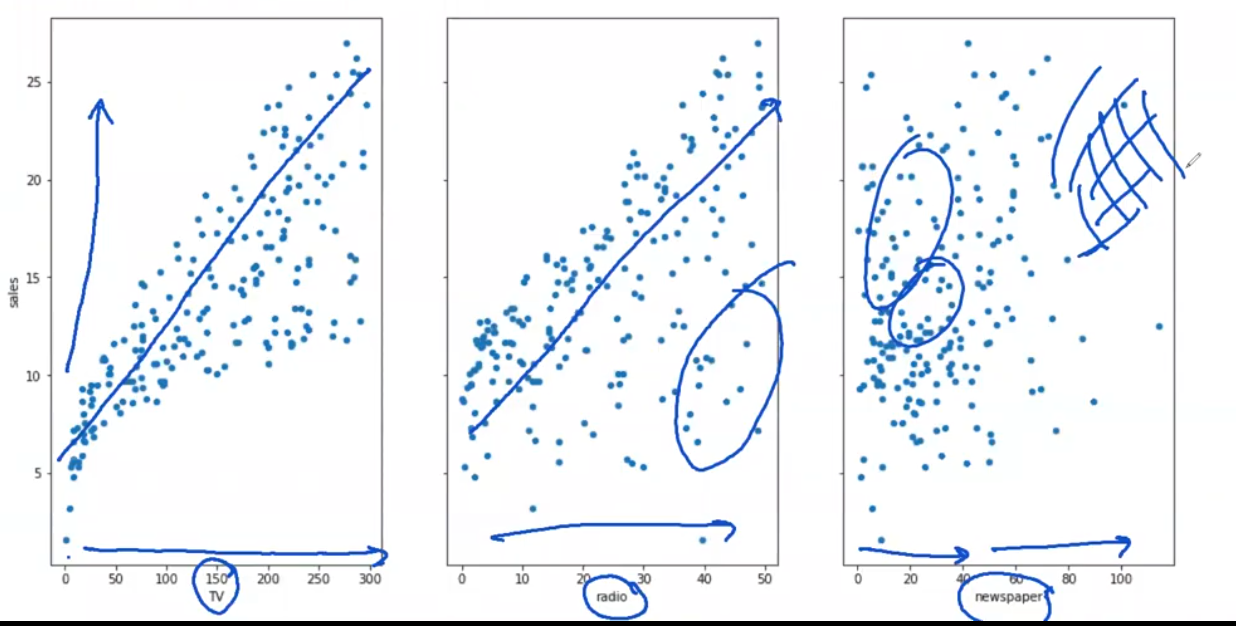

In [7]:
# Observation:
    # 1) Sales is Increasing with more "TV" advertisement
    # 2) Though, Sales is Increasing with more "Radio" advertisement
            # But Sales is not increasing propostionately further. 
            # Increasing Disbustion of Sales data
    # 3) Sales is Increasing with more "Newspaper" advertisement upto 40
            # but for [40+ units of "Newspaper" advertisement], Sales is not increasing
    # 4) 25+ units of Sales is acheived through
            # 300 units of "TV" advertisement ,
            # 50 units of "Radio" advertisement ,
            # 50 units of "Newspaper" advertisement ,

In [8]:
# to Create 
    # In-Dependent Variables (Xi) and 
    # Dependent Variables (y)
    
feature_cols = ['TV', 'radio','newspaper']
X = data[feature_cols]
y = data['sales']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

# to print Intercept and CO-efficientS
print(lm.intercept_)
print(lm.coef_) #o/p =~ [TV coefficient, Radio coefficient,Newspaper coefficient]

# y = m1 * x1 + m2 * x3 + m3 * x3 + c
# Sales = (0.045) * TV + (0.188) * Radio + (-0.001) * Newspaper + (2.938)
# Radio_Advertising has maximum and 'Newspaper_Advertising' has minimum/negative
        # impact on Sales

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [9]:
# Statistical Models
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data=data).fit()
# Ordinary Least Squares regression (OLS)
lm.conf_int() #Co-efficient (m) variables

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        18:11:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""